In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import pickle

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df1=data

In [4]:
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1575,7.5,0.52,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6
743,11.6,0.41,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53,10.0,5
1388,6.6,0.64,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3,5
166,6.8,0.64,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,5
1165,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
1064,8.2,0.74,0.09,2.0,0.067,5.0,10.0,0.99418,3.28,0.57,11.8,6
908,7.4,0.52,0.13,2.4,0.078,34.0,61.0,0.99528,3.43,0.59,10.8,6
873,9.1,0.21,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,7
323,10.3,0.59,0.42,2.8,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,6


In [5]:
data.isna().sum()
#Checking nan

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Creating def function..
def con_val(abc):
    
        if abc >= 7:
            return 1
        else:
            return 0

In [7]:
#Converting values 0 and 1 in column quality...
df1['quality']=data['quality'].apply(con_val)

In [8]:
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


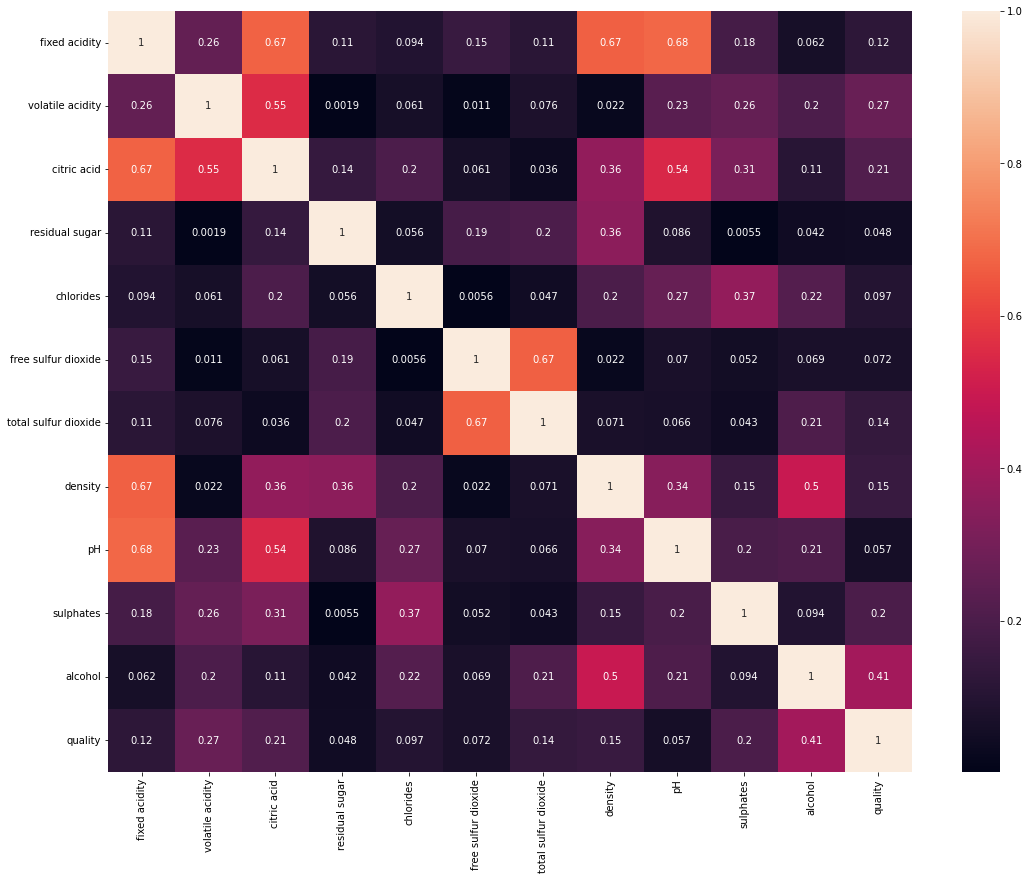

In [9]:
#Plottin a heatmap to see the relation between the features vs features...
df2_corr=df1.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df2_corr,annot=True,annot_kws={'size':10})
plt.show()

In [55]:
abc=df1.rename({"fixed acidity":"fixedacidity","volatile acidity":"volatileacidity","citric acid":"citricacid","residual sugar":"residualsugar","free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"},axis=1)

In [56]:
abc.head(2)

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


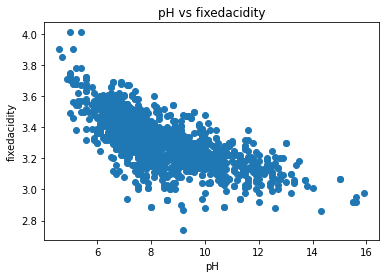

In [58]:
plt.scatter(abc.fixedacidity,abc.pH)
plt.xlabel('pH')
plt.ylabel('fixedacidity')
plt.title('pH vs fixedacidity')
plt.show()

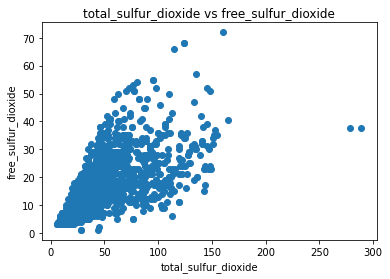

In [59]:
plt.scatter(abc.total_sulfur_dioxide,abc.free_sulfur_dioxide)
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('free_sulfur_dioxide')
plt.title('total_sulfur_dioxide vs free_sulfur_dioxide')
plt.show()

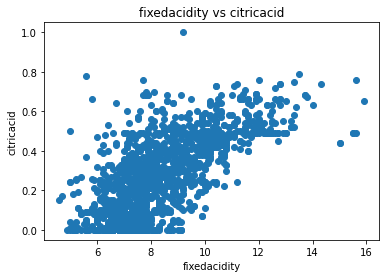

In [60]:
plt.scatter(abc.fixedacidity,abc.citricacid)
plt.xlabel('fixedacidity')
plt.ylabel('citricacid')
plt.title('fixedacidity vs citricacid')
plt.show()

In [ ]:
plt.scatter(abc.fixedacidity,abc.citricacid)
plt.xlabel('fixedacidity')
plt.ylabel('citricacid')
plt.title('fixedacidity vs citricacid')
plt.show()

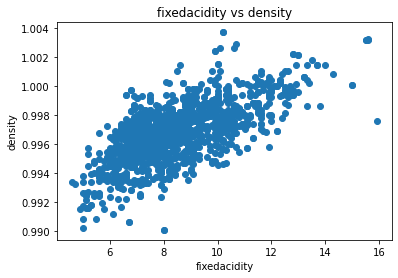

In [62]:
plt.scatter(abc.fixedacidity,abc.density)
plt.xlabel('fixedacidity')
plt.ylabel('density')
plt.title('fixedacidity vs density')
plt.show()

In [63]:
#Splitting features and label...
X=abc.drop(columns = ['quality'])
Y=abc['quality']

# train and test

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=41)

In [66]:
#importing decisiontree classifier..
from sklearn.tree import DecisionTreeClassifier

In [67]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [68]:
#Getting a training score
clf.score(X_train,Y_train)

1.0

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [74]:
#testing accuracy score..
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.8825

# Hyper parameter tuning...

In [100]:
#Tuning the parameters..
grid_para= {
    'criterion':['gini','entropy'],
    'max_depth':range(5,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [101]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid=grid_para,
                           cv=5,
                          n_jobs=-1)

In [102]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [104]:
#Finding the best combinations
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [121]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5,min_samples_leaf=8,min_samples_split=4,max_depth=10)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_leaf=8,
                       min_samples_split=4)

In [122]:
#testing accuracy score..
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.885

# confusion matrix

# conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       339
           1       0.70      0.43      0.53        61

    accuracy                           0.89       400
   macro avg       0.80      0.70      0.73       400
weighted avg       0.87      0.89      0.87       400



# Roc curve

In [128]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
#ROC curve

In [129]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False Positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.42622951 1.        ]
False Positive Rate= [0.         0.03244838 1.        ]


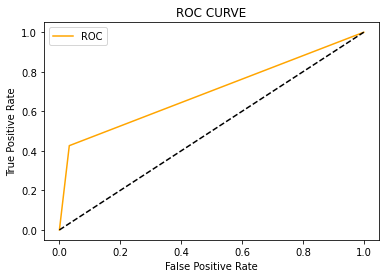

In [131]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='black',linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()


# auc Score

In [132]:
#Auc score..
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)

0.6968905653078002
